# Avance 3: Integración, Análisis Visual y Conclusiones Estratégicas

En este tercer avance del proyecto integrador, se realiza la **integración de los datos obtenidos y depurados en los avances anteriores**:  
- El dataset de **usuarios de Chicago** (Avance 1)  
- El dataset de **restaurantes de Chicago** extraído y limpiado desde la API de Yelp (Avance 2)  

El objetivo principal de este entregable es **cruzar y analizar ambos conjuntos de datos** para obtener insights relevantes sobre el comportamiento de los usuarios y la oferta gastronómica en la ciudad. Para ello, se desarrollan diversas **visualizaciones exploratorias** que permiten identificar patrones, tendencias y oportunidades de mercado.

A lo largo del notebook se presentan:
- **Visualizaciones clave** sobre características demográficas, preferencias y hábitos de consumo de los usuarios.
- **Análisis de la oferta gastronómica** por categorías, zonas y ratings.
- **Comparaciones y relaciones** entre variables de ambos datasets, buscando puntos de coincidencia y áreas de oportunidad.

Finalmente, se exponen **conclusiones estratégicas** orientadas a la empresa, destacando hallazgos que pueden guiar la toma de decisiones para campañas de marketing, segmentación de clientes y desarrollo de productos o servicios personalizados.

---

## **Preparación del entorno: Carga de librerías**

Para realizar el análisis, visualización y manipulación de los datos, se importan las siguientes librerías:


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display # Para mostrar DataFrames en Jupyter Notebook, aunque no es estrictamente necesario, es una buena práctica para visualizar los datos de manera más clara sin usar extensiones adicionales
import ast # Para evaluar cadenas que representan estructuras de datos de Python (como listas o diccionarios) y convertirlas en objetos de Python reales
import itertools

## **Carga de datos**

Se cargan los archivos previamente limpiados de usuarios y restaurantes de Chicago, generados en los avances anteriores.  
Esto permite trabajar con copias de los DataFrames originales para preservar la integridad de los datos fuente durante el análisis.

In [28]:
# cargar df necesarios 

usuarios_ori = pd.read_csv("Datos_usuarios_Chicago_limpios.csv") # Cargar el archivo CSV con los datos de usuarios
restaurantes_ori = pd.read_csv("Datos_YELP_limpios.csv") # Cargar el archivo CSV con los datos de restaurantes 
generales_ori = pd.read_csv("usuarios_limpios.csv") # Cargar el archivo CSV con los datos generales de Yelp

usuarios = usuarios_ori.copy() # Crear una copia del DataFrame original de usuarios para trabajar con ella
restaurantes = restaurantes_ori.copy() # Crear una copia del DataFrame original de restaurantes para trabajar con ella
generales = generales_ori.copy() # Crear una copia del DataFrame original de datos generales para trabajar con ella

A continuación, se muestran las primeras filas del DataFrame de usuarios para visualizar la estructura y las variables disponibles en el conjunto de datos.

Esto permite verificar que la carga de datos se realizó correctamente y conocer las columnas que se utilizarán en el análisis.

In [4]:
usuarios.head() # Mostrar las primeras filas del DataFrame de usuarios

,id_persona,nombre_completo,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
0,3456521319,Richard Adams,61,Masculino,Chicago,Medio,2,23.02,Sí,Sí,Vegetariano,No,(394)853-1965,No_aplica,Efectivo,2838.0
1,2916502228,Leah Cooper,44,Femenino,Chicago,Bajo,3,5.07,No,Sí,Mariscos,No,No_aplica,No_aplica,App,1365.0
2,5736368501,Jennifer Richardson,54,Femenino,Chicago,Alto,5,34.35,No,Sí,Carnes,Sí,No_aplica,No_aplica,Tarjeta,7133.0
3,9718391309,Alyssa Bryant,70,Femenino,Chicago,Bajo,1,6.59,No,Sí,Vegetariano,No,5093254270,No_aplica,Tarjeta,1205.0
4,9148064715,Michael Cochran,79,Masculino,Chicago,Muy Alto,8,78.02,No,Sí,Pescado,Sí,No_aplica,No_aplica,App,17625.0


In [5]:
restaurantes.head() # Mostrar las primeras filas del DataFrame de restaurantes

,id,alias,aliases,price_num,price_num_imputado,phone,address,rating,review_count,transactions,image_url,url,location.zip_code,coordinates.longitude,coordinates.latitude
0,qjnpkS8yZO8xcyEIy5OU9A,girl-and-the-goat-chicago,"[newamerican, bars, bakeries]",3,False,13124926262,809 W Randolph,4.4,10510,['delivery'],https://s3-media0.fl.yelpcdn.com/bphoto/ya6gjD...,https://www.yelp.com/biz/girl-and-the-goat-chi...,60607,-87.647946,41.884193
1,boE4Ahsssqic7o5wQLI04w,the-purple-pig-chicago,"[tapasmallplates, mediterranean, newamerican]",3,False,13124641744,444 N Michigan Ave,4.3,8856,"['delivery', 'pickup']",https://s3-media0.fl.yelpcdn.com/bphoto/rHHvhR...,https://www.yelp.com/biz/the-purple-pig-chicag...,60611,-87.624782,41.890694
2,gzhkdb6YoiFm5s3vriG1AA,gretel-chicago,"[cocktailbars, newamerican, speakeasies]",2,False,17737703427,2833 W Armitage Ave,4.5,415,"['delivery', 'pickup']",https://s3-media0.fl.yelpcdn.com/bphoto/-dxigk...,https://www.yelp.com/biz/gretel-chicago?adjust...,60647,-87.698577,41.917275
3,riT822EnU7y_5eCuJsd9sA,cindys-rooftop-chicago,"[newamerican, seafood, breakfast_brunch]",2,False,13127923502,12 S Michigan Ave,4.1,2717,['delivery'],https://s3-media0.fl.yelpcdn.com/bphoto/XLdHyZ...,https://www.yelp.com/biz/cindys-rooftop-chicag...,60603,-87.625006,41.881689
4,GZsrGq6H8CQ4YlGtE_Bm0Q,ciccio-mio-chicago-2,[italian],3,False,13127963316,226 W Kinzie,4.7,577,['delivery'],https://s3-media0.fl.yelpcdn.com/bphoto/eFIrEM...,https://www.yelp.com/biz/ciccio-mio-chicago-2?...,60654,-87.635240,41.889390


## **Algoritmo de recomendación: Integración de información de usuarios y restaurantes**

Para aprovechar al máximo los datos recopilados y limpiados en los avances anteriores, se desarrolla un **algoritmo de recomendación** que integra la información de los usuarios y los restaurantes.  
Este algoritmo permite sugerir restaurantes personalizados para cada usuario, considerando variables relevantes de ambos conjuntos de datos.

El proceso de recomendación toma en cuenta:
- El **perfil socioeconómico** y las **preferencias alimenticias** de cada usuario.
- Las **características de los restaurantes** (categorías, precios, ratings y popularidad).
- La compatibilidad entre el usuario y el restaurante, evaluando factores como la afinidad de gustos, la capacidad de pago y la calidad del establecimiento.

Esta integración permite generar recomendaciones más precisas y útiles, facilitando la toma de decisiones estratégicas para la empresa y mejorando la experiencia del cliente.

### **Definición de criterios de compatibilidad económica**

El primer paso del algoritmo de recomendación consiste en definir si un usuario puede pagar un restaurante, considerando su **estrato socioeconómico** y el **nivel de precio** del restaurante.  
Para esto, se utiliza una función que asigna un puntaje de compatibilidad basado en la relación entre ambos factores.  
Este puntaje será uno de los componentes clave en el cálculo final de la recomendación personalizada.

In [ ]:
# Funcion para determinar si un usuario puede pagar un restaurante segun su estrato y el precio del restaurante

def puede_pagar(estrato_socioeconomico, price_nume): # Cambié el nombre del parámetro a price_nume para evitar confusión con la columna del DataFrame
    compatibilidad = { # Diccionario que define la compatibilidad entre estrato socioeconómico y nivel de precio
        'Bajo': {'1': 0.9, '2': 0.3, '3': 0.1, '4': 0.0},
        'Medio': {'1': 0.7, '2': 0.9, '3': 0.4, '4': 0.1},
        'Alto': {'1': 0.5, '2': 0.8, '3': 0.9, '4': 0.7},
        'Muy Alto': {'1': 0.3, '2': 0.6, '3': 0.8, '4': 0.9}
    }
    
    price_str = str(price_nume) # Convertir price_nume a cadena para buscar en el diccionario
    
    return compatibilidad.get(estrato_socioeconomico, {}).get(price_str, 0.0) # Obtener la compatibilidad, devolviendo 0.0 si no se encuentra el estrato o el nivel de precio

Antes de continuar con el análisis y la integración, es necesario realizar un tratamiento especial a la columna **'aliases'** del DataFrame de restaurantes.  
Esta columna contiene listas almacenadas como cadenas de texto, por lo que se debe convertir cada elemento a una lista real de Python para facilitar su manipulación y análisis posterior.

A continuación, se realiza esta conversión utilizando la función `ast.literal_eval`.

In [ ]:
# Convertir la columna 'aliases' de cadenas a listas

restaurantes['aliases'] = restaurantes['aliases'].apply(ast.literal_eval)

Una vez convertida la columna **'aliases'** a listas, es útil explorar la diversidad de categorías presentes en los restaurantes.  
Para ello, se extraen todos los aliases y se calcula el número de valores únicos, lo que permite conocer la variedad de tipos de comida y servicios disponibles en el dataset.

Esto ayuda a identificar la amplitud de la oferta gastronómica y facilita posteriores análisis y recomendaciones.

In [ ]:
# Verificar el número de aliases únicos en la columna 'aliases'

todos_aliases = list(itertools.chain.from_iterable(restaurantes['aliases']))
valores_unicos = set(todos_aliases)
print(f"Número de aliases únicos: {len(valores_unicos)}")
print(valores_unicos)

### **Definición de compatibilidad alimentaria**

El siguiente paso del algoritmo consiste en evaluar la afinidad entre las **preferencias alimenticias del usuario** y las **categorías del restaurante**.  

Para ello, se utiliza una función que compara la preferencia declarada por el cliente con las categorías (aliases) del restaurante, utilizando un mapeo personalizado.

La función asigna un puntaje alto si existe coincidencia entre la preferencia y alguna de las categorías del restaurante, y un puntaje bajo en caso contrario.  
Este componente es fundamental para personalizar la recomendación según los gustos de cada usuario.

In [14]:
def le_gusta_comida(preferencia_cliente, categoria_restaurante): # Función para evaluar si la categoría del restaurante coincide con la preferencia del cliente
    
    mapeo = { # Diccionario que mapea las preferencias del cliente a listas de categorías de restaurantes
    'Carnes': ['chicken_wings', 'cajun', 'steak', 'bbq', 'burgers', 'chickenshop', 'argentine', 'southern', 'newamerican', 'spanish', 'kebab', 'latin', 'delis', 'comfortfood', 'caribbean', 'polish', 'venezuelan', 'sandwiches', 'tapas', 'tradamerican', 'australian', 'halal', 'mexican', 'korean', 'chinese', 'filipino', 'tacos', 'sardinian', 'modern_european', 'french', 'italian', 'pizza', 'hotpot', 'turkish', 'german', 'british', 'gastropubs', 'pastashops', 'tapasmallplates', 'diners'],
    
    'Mariscos': ['seafood', 'fishnchips'],
    
    'Vegetariano': ['vietnamese', 'noodles', 'mideastern', 'cambodian', 'asianfusion', 'thai', 'lebanese', 'indpak', 'soup', 'salad', 'himalayan', 'mediterranean', 'vegetarian', 'falafel', 'malaysian', 'singaporean', 'african'],
    
    'Otro': ['speakeasies', 'gourmet', 'restaurants', 'whiskeybars', 'desserts', 'icecream', 'bakeries', 'beerbar', 'cafes', 'intlgrocery', 'cocktailbars', 'coffee', 'wine_bars', 'lounges', 'beer_and_wine', 'pubs', 'venues', 'tikibars', 'breweries', 'brewpubs', 'supperclubs', 'karaoke', 'bars', 'food_court', 'brasseries'],
    
    'Pescado': ['sushi', 'peruvian', 'dimsum', 'japanese', 'izakaya', 'ramen', 'poke', 'hainan', 'japacurry'],
    
    'Vegano': ['taiwanese', 'somali', 'piadina']
    }
    
    pref = str(preferencia_cliente).lower() # Convertir la preferencia del cliente a minúsculas para comparación insensible a mayúsculas
    
    # Buscar la mejor coincidencia entre todas las categorías del restaurante
    mejor_score = 0.0
    
    # Si categoria_restaurante es una listalist
    if isinstance(categoria_restaurante, list): # Verificar si es una lista
        categorias_rest = [str(cat).lower() for cat in categoria_restaurante] # Convertir cada categoría a minúsculas
    else:
        categorias_rest = [str(categoria_restaurante).lower()] # Si no es una lista, convertir a minúsculas y poner en una lista
    
    # Buscar coincidencias
    for pref_key, cat_list in mapeo.items(): # Iterar sobre cada par clave-valor en el mapeo
        if pref_key.lower() in pref: # Comparar la clave del mapeo con la preferencia del cliente
            for categoria in cat_list: # Iterar sobre las categorías asociadas a esa clave
                for cat_rest in categorias_rest: # Iterar sobre las categorías del restaurante
                    if categoria in cat_rest: # Comparar la categoría del mapeo con la categoría del restaurante
                        mejor_score = max(mejor_score, 0.9) # Si hay coincidencia, asignar un score alto (0.9)
    
    # Si no hay coincidencia exacta, dar puntuación baja
    return mejor_score if mejor_score > 0 else 0.1

### **Cálculo de la calidad del restaurante**

Además de la compatibilidad económica y alimentaria, el algoritmo considera la **calidad del restaurante** como un factor relevante en la recomendación.  
Para ello, se define una función que combina el rating promedio del restaurante y su popularidad (número de reseñas), normalizando ambos valores y asignando un mayor peso al rating.

Esta métrica permite priorizar restaurantes bien valorados y con suficiente respaldo de clientes, mejorando la confianza en las recomendaciones generadas.

In [15]:
def calcular_calidad(rating, review_count): # Función para calcular la calidad del restaurante basada en rating y número de reseñas 
    
    # Normalizar rating (0-1)
    rating_norm = rating / 5.0
    
    # Normalizar popularidad (0-1)
    popularidad_norm = min(review_count / 1000, 1.0)
    
    # Combinar: 70% rating, 30% popularidad
    calidad_final = (rating_norm * 0.7) + (popularidad_norm * 0.3)
    return calidad_final

### **Función principal de recomendación personalizada**

Finalmente, se implementa la función `recomendar_restaurantes`, que integra todos los criterios definidos anteriormente para sugerir los restaurantes más adecuados para cada usuario.  
Esta función calcula un puntaje total para cada restaurante, combinando:

- **Compatibilidad económica** (50%)
- **Compatibilidad alimentaria** (30%)
- **Calidad del restaurante** (20%)

Luego, ordena los restaurantes según el puntaje obtenido y devuelve las mejores opciones para el usuario seleccionado.  
Este enfoque permite realizar recomendaciones personalizadas y alineadas con el perfil y preferencias de cada cliente.

In [ ]:
def recomendar_restaurantes(cliente_id, top_n=5): # Función principal para recomendar restaurantes a un cliente específico
    
    cliente = usuarios[usuarios['id_persona'] == cliente_id].iloc[0] # Obtener los datos del cliente por su ID
    
    scores = [] # Lista para almacenar los scores de cada restaurante
    
    for _, restaurante in restaurantes.iterrows(): # Iterar sobre cada restaurante en el DataFrame
       
        score_precio = puede_pagar(cliente['estrato_socioeconomico'], # Factor 1: Compatibilidad económica (50%)
                                  restaurante['price_num'])
        
        score_comida = le_gusta_comida(cliente['preferencias_alimenticias'], # Factor 2: Compatibilidad alimentaria (30%)
                                      restaurante['aliases'])
        
        score_calidad = calcular_calidad(restaurante['rating'], # Factor 3: Calidad del restaurante (20%)
                                        restaurante['review_count'])
        
        score_total = (score_precio * 0.5) + (score_comida * 0.3) + (score_calidad * 0.2) # Score total ponderado
        
        scores.append({ # Almacenar los resultados en un diccionario
            'restaurante_id': restaurante['id'],
            'nombre': restaurante.get('alias', 'Sin nombre'),
            'categorias': restaurante['aliases'],
            'preferencias_cliente': cliente['preferencias_alimenticias'],
            'precio_res': restaurante['price_num'],
            'review': restaurante['rating'],
            'score': score_total,
            'precio': score_precio,
            'comida': score_comida,
            'calidad': score_calidad
        })
    
    scores_df = pd.DataFrame(scores) # Convertir la lista de scores a un DataFrame
    top_recommendations = scores_df.nlargest(top_n, 'score') # Obtener las top N recomendaciones basadas en el score total
    
    return top_recommendations # Devolver las recomendaciones finales

Para ilustrar el funcionamiento del sistema de recomendación, a continuación se muestran los **top 5 restaurantes recomendados** para cinco clientes diferentes seleccionados del dataset.  
Esto permite observar cómo varían las sugerencias en función del perfil y las preferencias de cada usuario.

El ciclo recorre una lista de identificadores de usuario (`id_persona`), genera las recomendaciones personalizadas para cada uno y muestra los resultados de manera individual.

In [24]:
# Mostrar recomendaciones para 5 clientes diferentes

ids_prueba = [3456521319, 6637880115, 2916502228, 9086147474, 1840383636]  # Reemplaza por IDs válidos de tu dataset

for cliente_id in ids_prueba:
    print(f"\nTop 5 restaurantes recomendados para cliente {cliente_id}:")
    recomendaciones = recomendar_restaurantes(cliente_id=cliente_id)
    display(recomendaciones)


Top 5 restaurantes recomendados para cliente 3456521319:


,restaurante_id,nombre,categorias,preferencias_cliente,precio_res,review,score,precio,comida,calidad
24,1Q7RL7Hc63wKa2A9ec3zXw,il-porcellino-chicago,"[italian, bars, salad]",Vegetariano,2,4.4,0.9032,0.9,0.9,0.916
14,tuJraaFffIS_JNK_4ZqGTA,ema-chicago-6,"[mediterranean, tapasmallplates, salad]",Vegetariano,2,4.3,0.9004,0.9,0.9,0.902
151,nO8Yrt4l4JLSvCAkkwrk1Q,gyu-kaku-japanese-bbq-chicago,"[japanese, bbq, asianfusion]",Vegetariano,2,4.2,0.8976,0.9,0.9,0.888
187,U9D0vqEP4QrJfJYs8mr3DA,oiistar-chicago,"[asianfusion, ramen]",Vegetariano,2,4.2,0.8976,0.9,0.9,0.888
39,FzYi3AVHoYZnWXe1BQrQEw,mott-st-chicago-2,"[asianfusion, bars]",Vegetariano,2,4.0,0.8920,0.9,0.9,0.860



Top 5 restaurantes recomendados para cliente 6637880115:


,restaurante_id,nombre,categorias,preferencias_cliente,precio_res,review,score,precio,comida,calidad
3,riT822EnU7y_5eCuJsd9sA,cindys-rooftop-chicago,"[newamerican, seafood, breakfast_brunch]",Mariscos,2,4.1,0.89480,0.9,0.9,0.8740
91,eWEfgeuMkGjC-yeV7dXArw,monarch-and-lion-chicago-3,"[british, fishnchips, indpak]",Mariscos,2,4.1,0.84758,0.9,0.9,0.6379
36,0IYXh7l_VppKw5y97FehoA,kasama-chicago,"[filipino, bakeries, newamerican]",Mariscos,2,4.5,0.66600,0.9,0.1,0.9300
7,VPJk-SEWSWS_nGoQvM-COw,penumbra-chicago,"[wine_bars, seafood, steak]",Mariscos,3,4.8,0.66416,0.4,0.9,0.9708
9,xoi7Cw7FoknAx5p880RtWQ,au-cheval-chicago,"[bars, burgers, tradamerican]",Mariscos,2,4.4,0.66320,0.9,0.1,0.9160



Top 5 restaurantes recomendados para cliente 2916502228:


,restaurante_id,nombre,categorias,preferencias_cliente,precio_res,review,score,precio,comida,calidad
110,5O_UGfc_aZf_Y0Q5audAhg,mogadishu-restaurant-chicago-2,"[african, somali]",Mariscos,1,4.6,0.61846,0.9,0.1,0.6923
3,riT822EnU7y_5eCuJsd9sA,cindys-rooftop-chicago,"[newamerican, seafood, breakfast_brunch]",Mariscos,2,4.1,0.59480,0.3,0.9,0.8740
91,eWEfgeuMkGjC-yeV7dXArw,monarch-and-lion-chicago-3,"[british, fishnchips, indpak]",Mariscos,2,4.1,0.54758,0.3,0.9,0.6379
7,VPJk-SEWSWS_nGoQvM-COw,penumbra-chicago,"[wine_bars, seafood, steak]",Mariscos,3,4.8,0.51416,0.1,0.9,0.9708
70,8wARj6QqmnSkUqLwoBCn7w,gibsons-italia-chicago-2,"[steak, italian, seafood]",Mariscos,3,4.3,0.50040,0.1,0.9,0.9020



Top 5 restaurantes recomendados para cliente 9086147474:


,restaurante_id,nombre,categorias,preferencias_cliente,precio_res,review,score,precio,comida,calidad
18,apyIymDFbUK7u-Y3V5kmkA,bavettes-bar-and-boeuf-chicago,"[steak, seafood, bars]",Mariscos,4,4.5,0.90600,0.9,0.9,0.9300
19,UK5Xb8xqUOUBi5vQu0bQXQ,maple-and-ash-chicago,"[steak, seafood, breakfast_brunch]",Mariscos,4,4.2,0.89760,0.9,0.9,0.8880
7,VPJk-SEWSWS_nGoQvM-COw,penumbra-chicago,"[wine_bars, seafood, steak]",Mariscos,3,4.8,0.86416,0.8,0.9,0.9708
38,FiDxI03abCAfA4pgl1NJ1w,butcher-and-the-bear-chicago,"[steak, seafood, burgers]",Mariscos,4,4.5,0.85380,0.9,0.9,0.6690
70,8wARj6QqmnSkUqLwoBCn7w,gibsons-italia-chicago-2,"[steak, italian, seafood]",Mariscos,3,4.3,0.85040,0.8,0.9,0.9020



Top 5 restaurantes recomendados para cliente 1840383636:


,restaurante_id,nombre,categorias,preferencias_cliente,precio_res,review,score,precio,comida,calidad
18,apyIymDFbUK7u-Y3V5kmkA,bavettes-bar-and-boeuf-chicago,"[steak, seafood, bars]",Carnes,4,4.5,0.90600,0.9,0.9,0.9300
154,pbEiXam9YJL3neCYHGwLUA,alinea-chicago,"[newamerican, modern_european]",Carnes,4,4.4,0.90320,0.9,0.9,0.9160
32,XKUZV9O2sRFLDIpAmwmG5g,boka-chicago,[newamerican],Carnes,4,4.3,0.90040,0.9,0.9,0.9020
19,UK5Xb8xqUOUBi5vQu0bQXQ,maple-and-ash-chicago,"[steak, seafood, breakfast_brunch]",Carnes,4,4.2,0.89760,0.9,0.9,0.8880
105,PH2qRMJ2s4oqI1-9wlu2jw,rose-mary-chicago-2,"[italian, modern_european, cocktailbars]",Carnes,4,4.3,0.88954,0.9,0.9,0.8477


### **Conclusiones**

La integración de los datos de usuarios y restaurantes de Chicago ha permitido construir un sistema de recomendación personalizado que aprovecha tanto las características demográficas y preferencias alimenticias de los clientes, como la oferta gastronómica real de la ciudad. Este enfoque integral facilita la identificación de patrones de consumo, afinidades y oportunidades de mercado que serían difíciles de detectar analizando cada conjunto de datos por separado.

Gracias a la combinación de variables socioeconómicas, gustos individuales y atributos de los restaurantes (como categorías, precios y calidad), es posible generar recomendaciones más precisas y alineadas con las necesidades de cada usuario. Esta metodología no solo mejora la experiencia del cliente, sino que también proporciona a la empresa información valiosa para diseñar campañas de marketing segmentadas, optimizar la oferta de productos y servicios, y tomar decisiones estratégicas basadas en datos reales.

En resumen, la integración de fuentes de información heterogéneas potencia el análisis exploratorio y predictivo, permitiendo a las organizaciones anticipar tendencias, personalizar la comunicación y maximizar el impacto de sus acciones comerciales en un entorno altamente competitivo.

## **Visualizaciones exploratorias**

Para comprender mejor la relación entre los usuarios y la oferta gastronómica de Chicago, se presentan a continuación diversas **visualizaciones exploratorias**.  
Estas gráficas permiten identificar patrones de comportamiento, tendencias de consumo y oportunidades de mercado, facilitando el análisis tanto descriptivo como estratégico.

Las visualizaciones incluyen:
- Distribución de características demográficas y preferencias alimenticias de los usuarios.
- Análisis de la oferta de restaurantes por categorías, zonas y niveles de precio.
- Comparaciones entre variables clave de ambos conjuntos de datos.
- Ejemplos de recomendaciones personalizadas y su justificación.

Estas herramientas visuales son fundamentales para comunicar hallazgos de manera clara y respaldar la toma de decisiones basada en datos.

> **Nota:**  
> Las siguientes visualizaciones se realizaron utilizando el dataset completo disponible, no únicamente los datos correspondientes a la ciudad de Chicago. Esto permite obtener una perspectiva más amplia sobre las tendencias y patrones generales presentes en toda la muestra analizada.

C:\Users\mfyz1\AppData\Local\Temp\ipykernel_18996\2723037691.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gasto_promedio_ciudad.values, y=gasto_promedio_ciudad.index, palette='crest') # Usa los valores y los índices de la serie para el gráfico


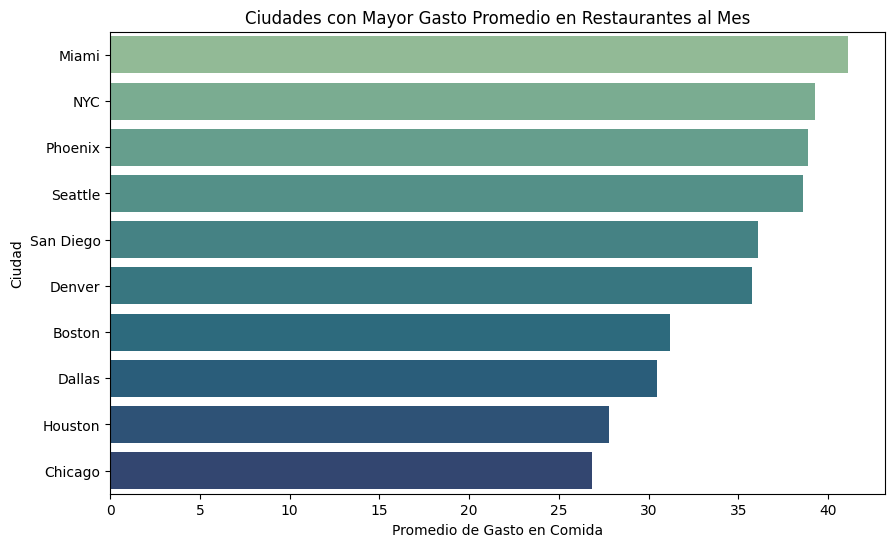

In [29]:
# Hacer un gráfico que muestre cuáles son las ciudades en las que más dinero se gasta en promedio en restaurantes al mes. 

gasto_promedio_ciudad = generales.groupby('ciudad_residencia')['promedio_gasto_comida'].mean ().sort_values(ascending=False) # Agrupa por ciudad y calcula el promedio de gasto en comida, luego ordena de mayor a menor

plt.figure(figsize=(10,6))
sns.barplot(x=gasto_promedio_ciudad.values, y=gasto_promedio_ciudad.index, palette='crest') # Usa los valores y los índices de la serie para el gráfico
plt.title('Ciudades con Mayor Gasto Promedio en Restaurantes al Mes')
plt.xlabel('Promedio de Gasto en Comida')
plt.ylabel('Ciudad')
plt.show()

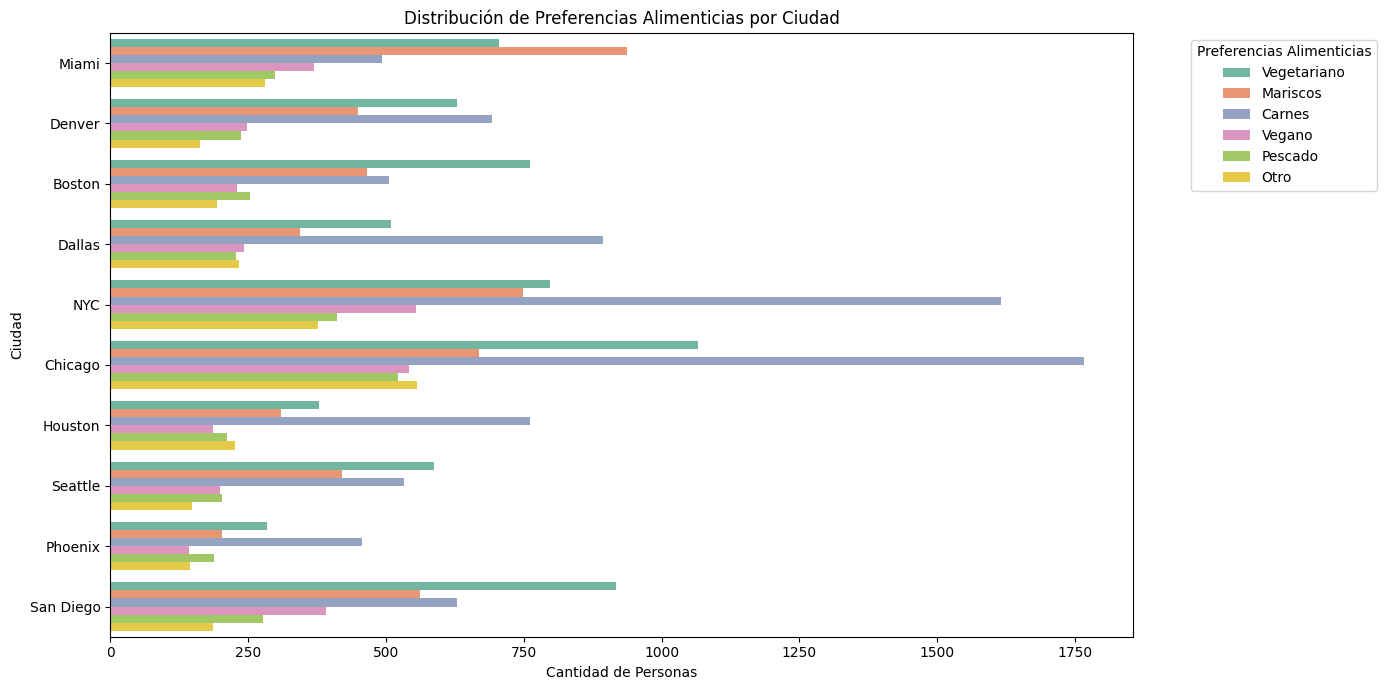

In [30]:
# Mostrar cómo se distribuyen las preferencias alimenticias en todas las ciudades.

plt.figure(figsize=(14,7))
sns.countplot(
    data=generales,
    y='ciudad_residencia',
    hue='preferencias_alimenticias',
    palette='Set2'
)
plt.title('Distribución de Preferencias Alimenticias por Ciudad')
plt.xlabel('Cantidad de Personas')
plt.ylabel('Ciudad')
plt.legend(title='Preferencias Alimenticias', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\mfyz1\AppData\Local\Temp\ipykernel_18996\3359949256.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=perfil.values, y=perfil.index, palette='viridis')


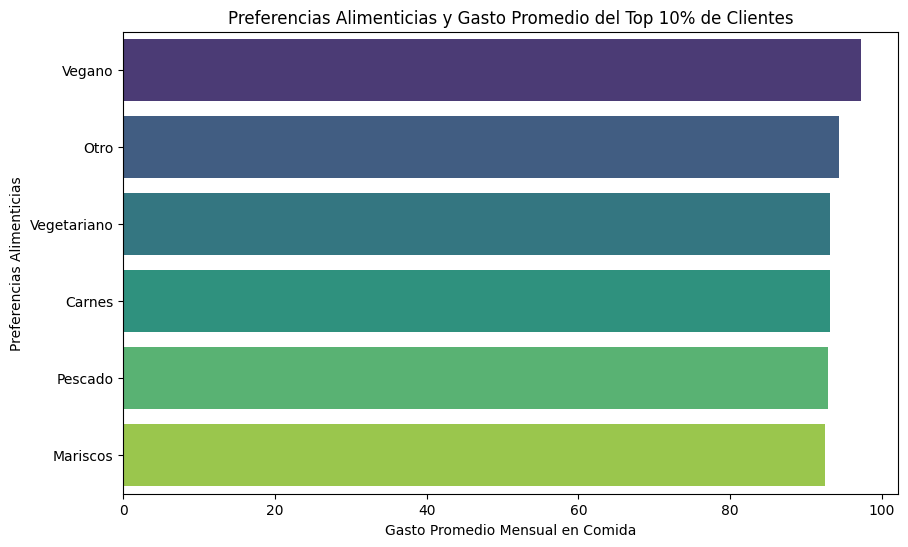

In [31]:
# Perfilar los clientes de mayor gasto: Qué comidas les gustan, cuánto suelen gastar al mes.

# Seleccionar el 10% superior de clientes por gasto
top_gasto = generales[generales['promedio_gasto_comida'] >= generales['promedio_gasto_comida'].quantile(0.9)]

# Agrupar por preferencias alimenticias y calcular el gasto promedio
perfil = top_gasto.groupby('preferencias_alimenticias')['promedio_gasto_comida'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=perfil.values, y=perfil.index, palette='viridis')
plt.title('Preferencias Alimenticias y Gasto Promedio del Top 10% de Clientes')
plt.xlabel('Gasto Promedio Mensual en Comida')
plt.ylabel('Preferencias Alimenticias')
plt.show()

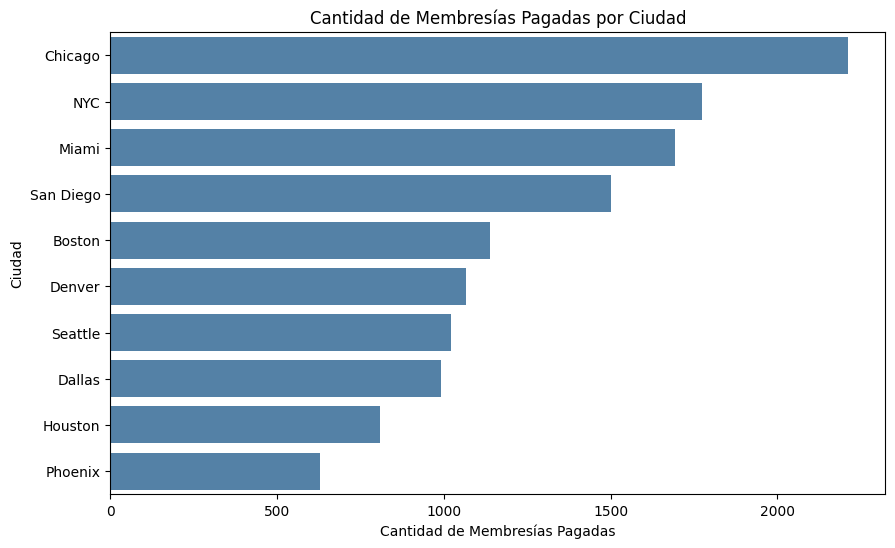

In [32]:
# Convertir la columna a valores numéricos
generales['membresia_premium'] = generales['membresia_premium'].map({'Sí': 1, 'No': 0})

# Ahora sí, agrupa y grafica
membresias_por_ciudad = generales.groupby('ciudad_residencia')['membresia_premium'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=membresias_por_ciudad.values, y=membresias_por_ciudad.index, color='steelblue')
plt.title('Cantidad de Membresías Pagadas por Ciudad')
plt.xlabel('Cantidad de Membresías Pagadas')
plt.ylabel('Ciudad')
plt.show()

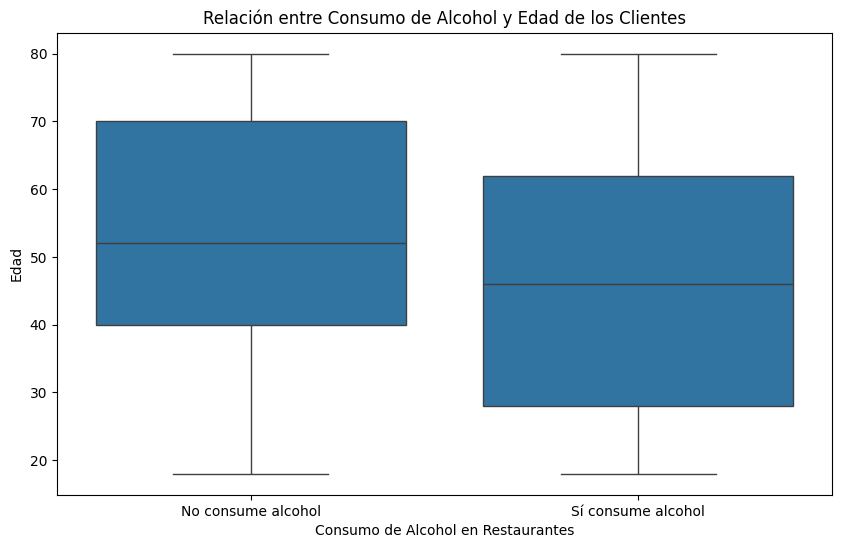

In [33]:
# Generar un gráfico que muestre la relación entre el consumo de alcohol en los restaurantes y la edad de los clientes.

generales['consume_licor'] = generales['consume_licor'].map({'Sí': 1, 'No': 0})
plt.figure(figsize=(10,6))
sns.boxplot(x='consume_licor', y='edad', data=generales)
plt.xticks([0, 1], ['No consume alcohol', 'Sí consume alcohol'])
plt.title('Relación entre Consumo de Alcohol y Edad de los Clientes')
plt.xlabel('Consumo de Alcohol en Restaurantes')
plt.ylabel('Edad')
plt.show()

C:\Users\mfyz1\AppData\Local\Temp\ipykernel_18996\4188310417.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='consume_licor', y='edad', data=generales, palette='pastel')


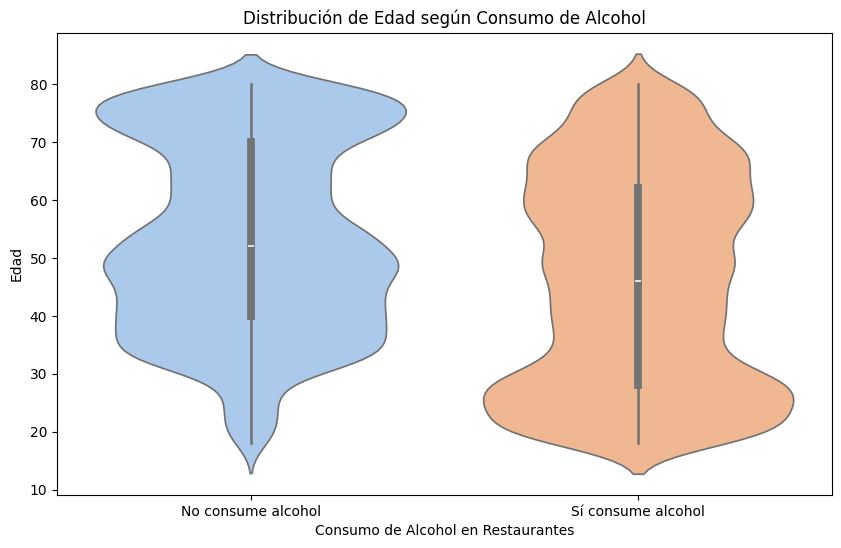

In [34]:
plt.figure(figsize=(10,6))
sns.violinplot(x='consume_licor', y='edad', data=generales, palette='pastel')
plt.xticks([0, 1], ['No consume alcohol', 'Sí consume alcohol'])
plt.title('Distribución de Edad según Consumo de Alcohol')
plt.xlabel('Consumo de Alcohol en Restaurantes')
plt.ylabel('Edad')
plt.show()

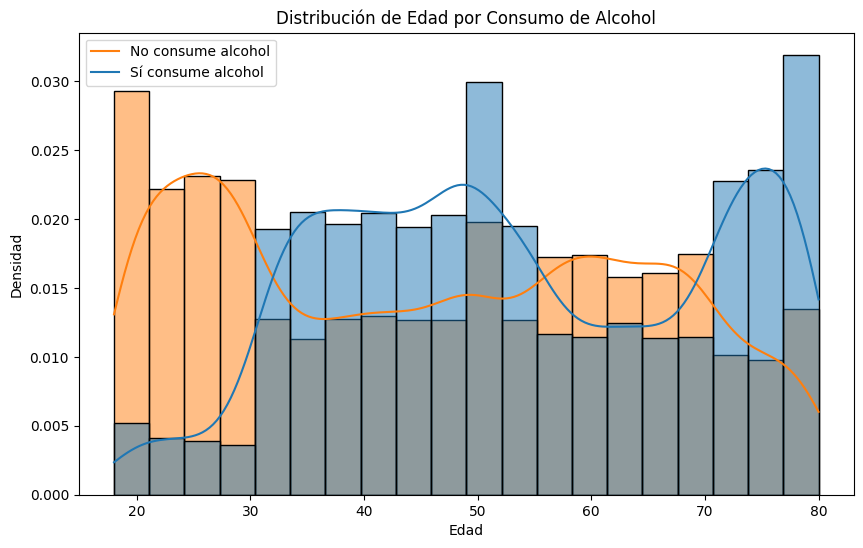

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(data=generales, x='edad', hue='consume_licor', bins=20, kde=True, stat='density', common_norm=False)
plt.xticks()
plt.title('Distribución de Edad por Consumo de Alcohol')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend(['No consume alcohol', 'Sí consume alcohol'])
plt.show()

## **Visualizaciones específicas de Chicago**

A continuación, se presentan visualizaciones elaboradas exclusivamente con los datos correspondientes a la ciudad de Chicago.  
El objetivo es profundizar en los patrones de consumo, preferencias y características de los usuarios y restaurantes dentro de este mercado local, permitiendo identificar oportunidades y tendencias particulares que pueden ser relevantes para estrategias comerciales o de marketing focalizadas en la ciudad.

#### Pairplot de variables numéricas de usuarios de Chicago

Se muestra a continuación un **pairplot** que permite explorar visualmente las relaciones y distribuciones entre las variables numéricas del dataset de usuarios de Chicago.  
Este tipo de gráfico facilita la identificación de patrones, tendencias y posibles correlaciones entre características como edad, ingresos, frecuencia de visita y gasto promedio en restaurantes.

Cada gráfico de dispersión representa la relación entre dos variables, mientras que la diagonal muestra la distribución individual de cada variable.

<Figure size 1000x600 with 0 Axes>

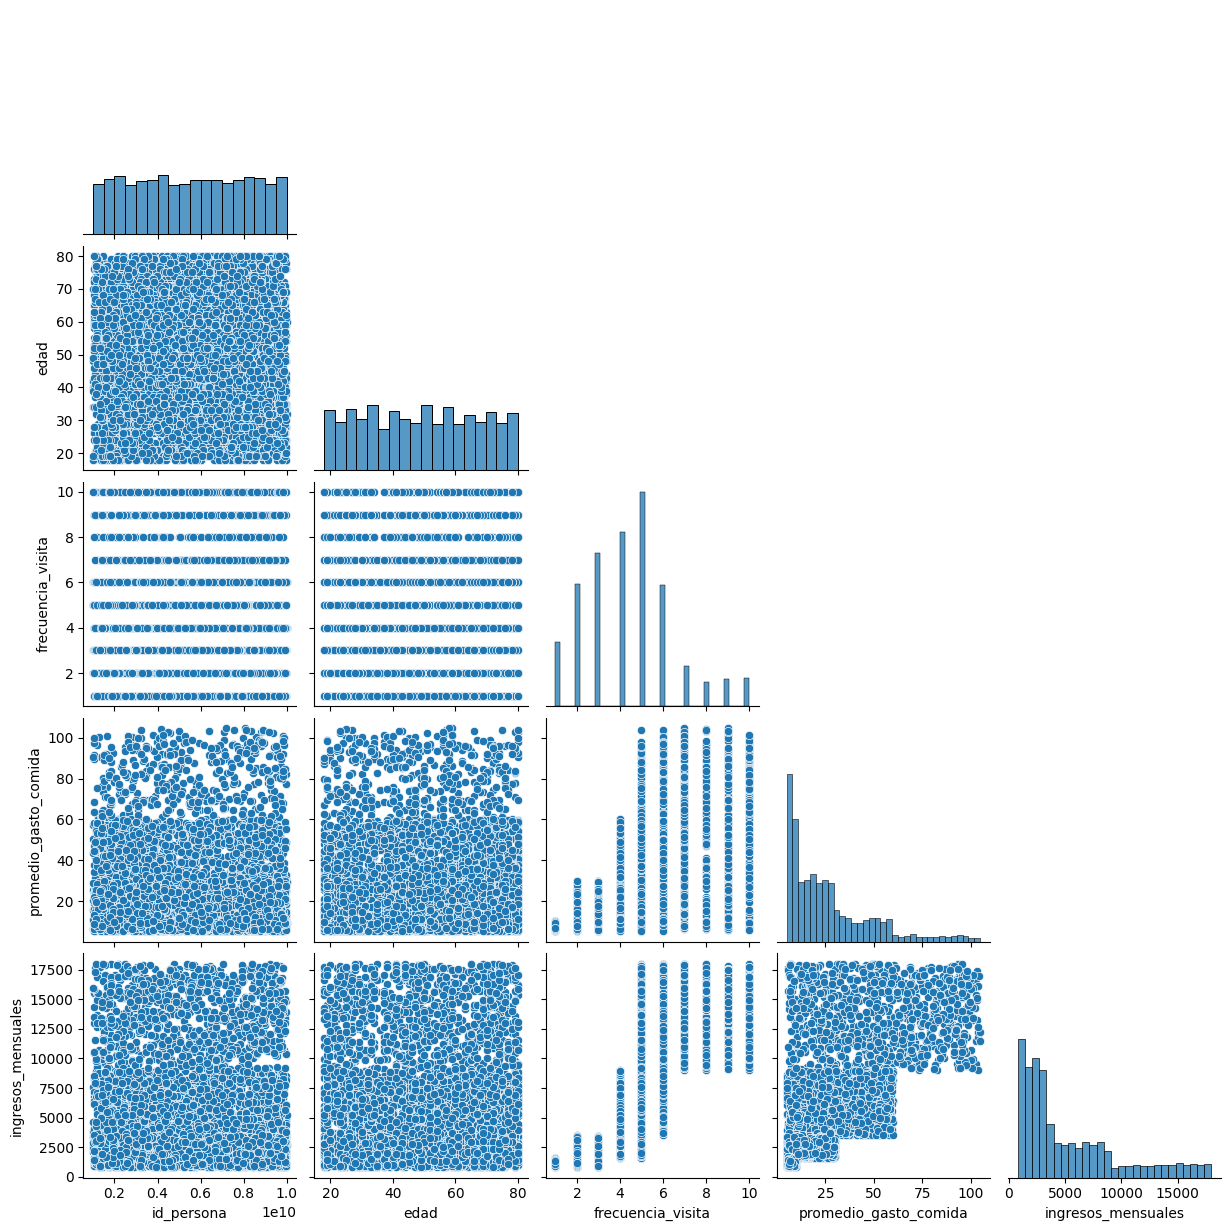

In [76]:
# generar graficos para hacer un analisis exploratorio de datos (EDA)

plt.figure(figsize=(10,6))

sns.pairplot(data=usuarios, corner=True)

# mostrtar sin lo repetido

#### Distribución de usuarios por estrato socioeconómico en Chicago

El siguiente gráfico muestra cómo se distribuyen los usuarios de Chicago según su estrato socioeconómico.  
Esta visualización permite identificar la proporción de participantes en cada nivel socioeconómico, lo cual es relevante para analizar patrones de consumo y segmentar estrategias de mercado dentro de la ciudad.

C:\Users\mfyz1\AppData\Local\Temp\ipykernel_18996\4011091165.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=estratos.index, y=estratos.values, palette='viridis')


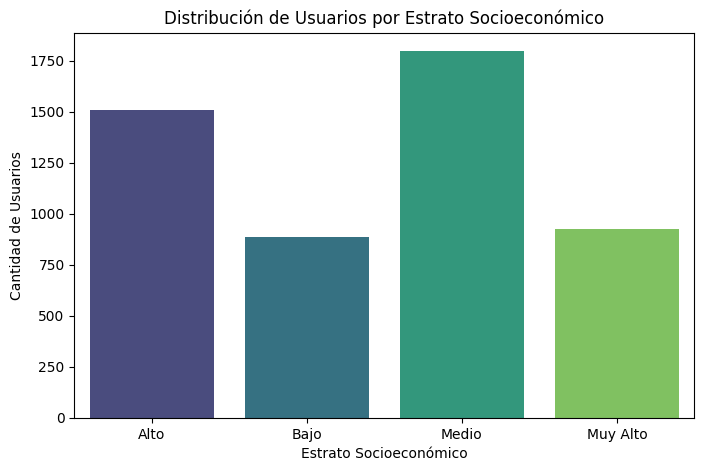

In [37]:
# listado que muestre como se distribuyen las personas en los diferentes estratos socioeconómicos

estratos = usuarios['estrato_socioeconomico'].value_counts().sort_index()
plt.figure(figsize=(8,5))
sns.barplot(x=estratos.index, y=estratos.values, palette='viridis')
plt.title('Distribución de Usuarios por Estrato Socioeconómico')
plt.xlabel('Estrato Socioeconómico')
plt.ylabel('Cantidad de Usuarios')
plt.show()

#### Relación entre frecuencia de visita y gasto promedio por estrato socioeconómico

El siguiente gráfico de dispersión muestra la relación entre la frecuencia con la que los usuarios de Chicago visitan restaurantes y su gasto promedio en comida, diferenciando por estrato socioeconómico.  
Esta visualización permite identificar patrones de consumo y analizar cómo varía el gasto en función de la frecuencia de visita y el nivel socioeconómico de los usuarios.

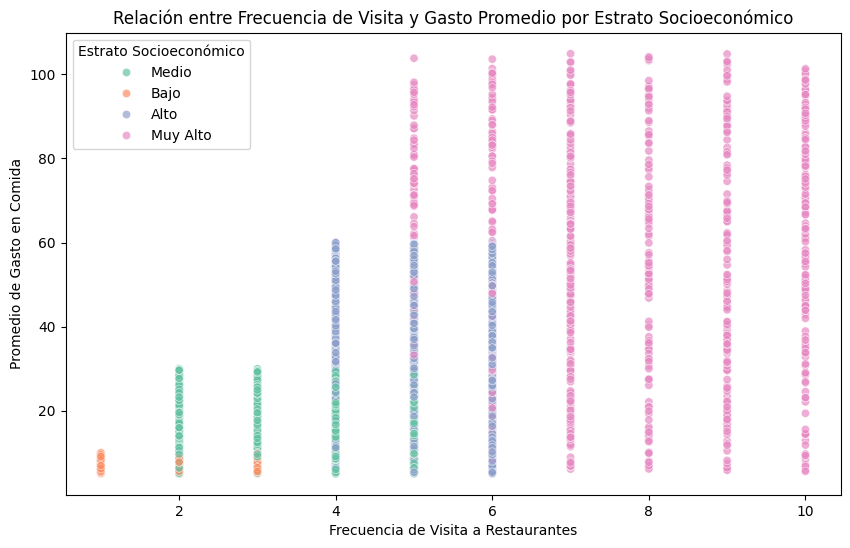

In [38]:
# Generar un gráfico donde se evidencie cómo es la relación entre la frecuencia de visita a los restaurantes y el gasto promedio por comida según el estrato socioeconómico

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=usuarios,
    x='frecuencia_visita',
    y='promedio_gasto_comida',
    hue='estrato_socioeconomico',
    palette='Set2',
    alpha=0.7
)
plt.title('Relación entre Frecuencia de Visita y Gasto Promedio por Estrato Socioeconómico')
plt.xlabel('Frecuencia de Visita a Restaurantes')
plt.ylabel('Promedio de Gasto en Comida')
plt.legend(title='Estrato Socioeconómico')
plt.show()

#### Relación entre ingresos mensuales y gasto promedio en comida

El siguiente gráfico de dispersión muestra cómo se relacionan los ingresos mensuales de los usuarios de Chicago con su gasto promedio en comida.  
Esta visualización permite identificar si existe una tendencia entre el nivel de ingresos y el gasto destinado a restaurantes, lo cual es útil para analizar el comportamiento de consumo según la capacidad económica.

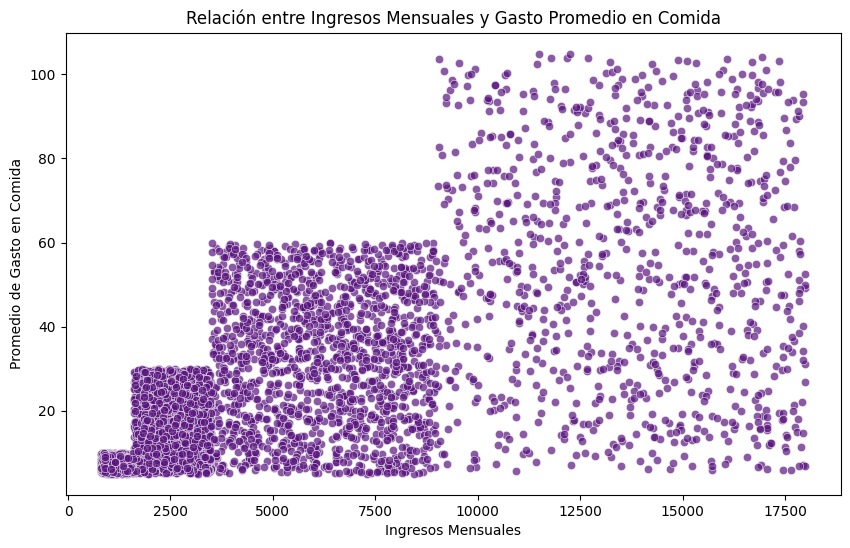

In [74]:
# Crear un gráfico de dispersión que evidencie cómo es la relación entre el gasto promedio mensual de todas las personas y sus ingresos mensuales.

plt.figure(figsize=(10,6))
colors = sns.color_palette('magma', n_colors=10)
sns.scatterplot(
    data=usuarios,
    x='ingresos_mensuales',
    y='promedio_gasto_comida',
    alpha=0.7,
    color=colors[2]
)
plt.title('Relación entre Ingresos Mensuales y Gasto Promedio en Comida')
plt.xlabel('Ingresos Mensuales')
plt.ylabel('Promedio de Gasto en Comida')
plt.show()

#### Boxplot de edad de usuarios

El siguiente boxplot muestra la distribución de la edad de los usuarios de Chicago.  
Esta visualización permite identificar la mediana, los cuartiles y posibles valores atípicos en la variable edad, facilitando el análisis de la composición demográfica de la muestra.

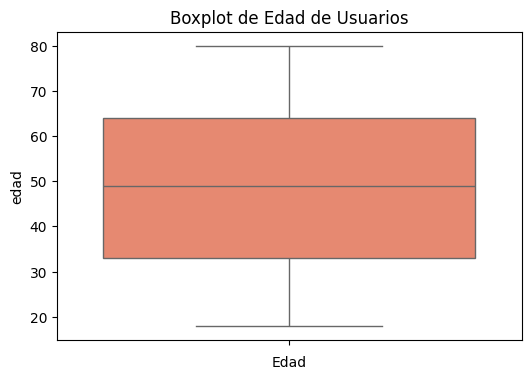

In [69]:
# Boxplot para la edad de los usuarios 

plt.figure(figsize=(6,4))
colors = sns.color_palette('magma', n_colors=10)
sns.boxplot(y=usuarios['edad'], color=colors[7])
plt.title('Boxplot de Edad de Usuarios')
plt.xlabel('Edad')
plt.show()

#### Boxplot de promedio de gasto en comida

El siguiente boxplot muestra la distribución del promedio de gasto en comida de los usuarios de Chicago.  
Esta visualización permite identificar la mediana, los cuartiles y posibles valores atípicos en el gasto, facilitando el análisis de los patrones de consumo y la variabilidad entre los usuarios.

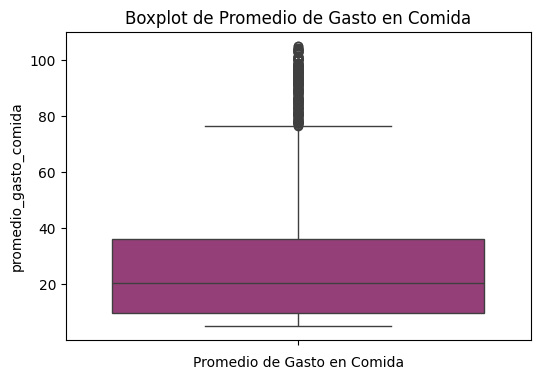

In [67]:
# Boxplot para el promedio de gasto en comida

plt.figure(figsize=(6,4))
colors = sns.color_palette('magma', n_colors=10)
sns.boxplot(y=usuarios['promedio_gasto_comida'], color=colors[4])
plt.title('Boxplot de Promedio de Gasto en Comida')
plt.xlabel('Promedio de Gasto en Comida')
plt.show()

#### Boxplot de número de reseñas de restaurantes

El siguiente boxplot muestra la distribución del número de reseñas recibidas por los restaurantes de Chicago.  
Esta visualización permite identificar la mediana, los cuartiles y posibles valores atípicos en la cantidad de reseñas, lo que ayuda a analizar la popularidad y visibilidad promedio de los negocios en la plataforma.

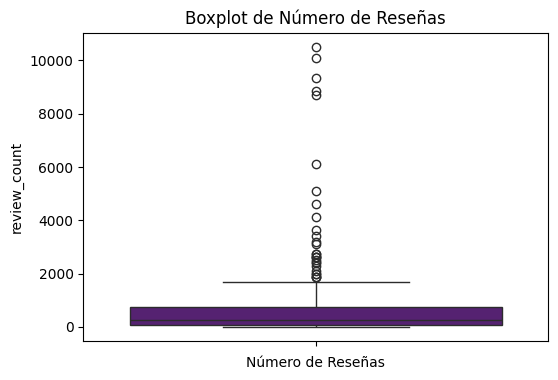

In [66]:
# Boxplot para el rating de los negocios 

if 'review_count' in restaurantes:
    plt.figure(figsize=(6,4))
    colors = sns.color_palette('magma', n_colors=10)
    sns.boxplot(y=restaurantes['review_count'], color=colors[2])
    plt.title('Boxplot de Número de Reseñas')
    plt.xlabel('Número de Reseñas')
    plt.show()

#### Distribución de ratings de negocios

El siguiente histograma muestra la distribución de los ratings (calificaciones) de los restaurantes de Chicago.  
Esta visualización permite observar la frecuencia de cada nivel de rating, identificar tendencias en la percepción de calidad y detectar si existen concentraciones en ciertos valores, lo que ayuda a analizar la satisfacción general de los clientes con la oferta gastronómica local.

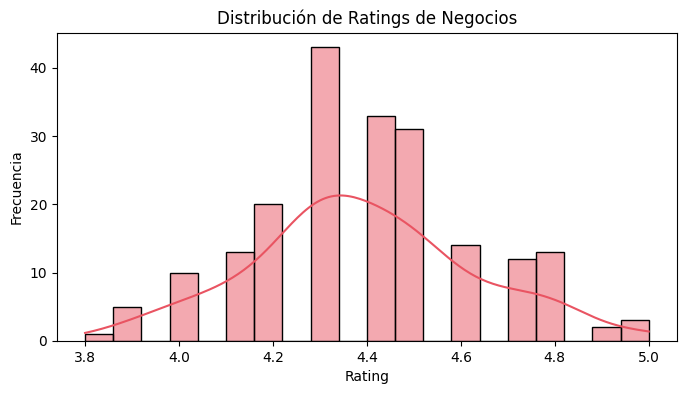

In [65]:
# Boxplot para el rating de los negocios 

plt.figure(figsize=(8,4))
colors = sns.color_palette('magma', n_colors=10)
sns.histplot(restaurantes['rating'], bins=20, kde=True, color=colors[6])
plt.title('Distribución de Ratings de Negocios')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()

#### Para poder observar correctamente la distribución de las categorías de los restaurantes, es recomendable transformar la columna de categorías (que originalmente contiene listas) en un formato donde cada categoría individual tenga su propia fila.  

La columna 'aliases' contiene listas de categorías almacenadas como texto.  
Para poder analizarlas y transformarlas correctamente, primero es necesario convertir cada string en una lista real de Python utilizando `ast.literal_eval`.  
Esto permite manipular y explotar las categorías de manera individual en los siguientes pasos del análisis.

In [ ]:
# Convertir la columna 'aliases' de string a lista
restaurantes['aliases'] = restaurantes['aliases'].apply(ast.literal_eval)

Para analizar la frecuencia de cada categoría de restaurante de forma individual, es necesario "aplanar" la columna 'aliases', que contiene listas de categorías por restaurante.  
Esto se logra utilizando el método `explode`, que transforma cada elemento de la lista en una fila separada.  
Así, cada restaurante puede aparecer varias veces, una por cada categoría, lo que permite contar y visualizar correctamente la popularidad de cada tipo de comida en el dataset.

In [ ]:
# Ahora sí aplana la columna 'aliases' para que cada categoría individual tenga su propia fila
cat_explode = restaurantes.explode('aliases')

# Cuenta las 10 categorías individuales más comunes (por palabra completa)
top_cats = cat_explode['aliases'].value_counts().head(15)

# Convierte a DataFrame para graficar
cat_df = top_cats.reset_index()
cat_df.columns = ['Categoría', 'Cantidad']

El siguiente gráfico de barras muestra las 15 categorías individuales de restaurantes más frecuentes en el dataset.  
Esto permite visualizar de manera clara cuáles son los tipos de comida o servicios gastronómicos con mayor presencia en la ciudad, facilitando la identificación de tendencias y preferencias predominantes en la oferta local.

C:\Users\mfyz1\AppData\Local\Temp\ipykernel_18996\2990866964.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cantidad', y='Categoría', data=cat_df, palette='magma')


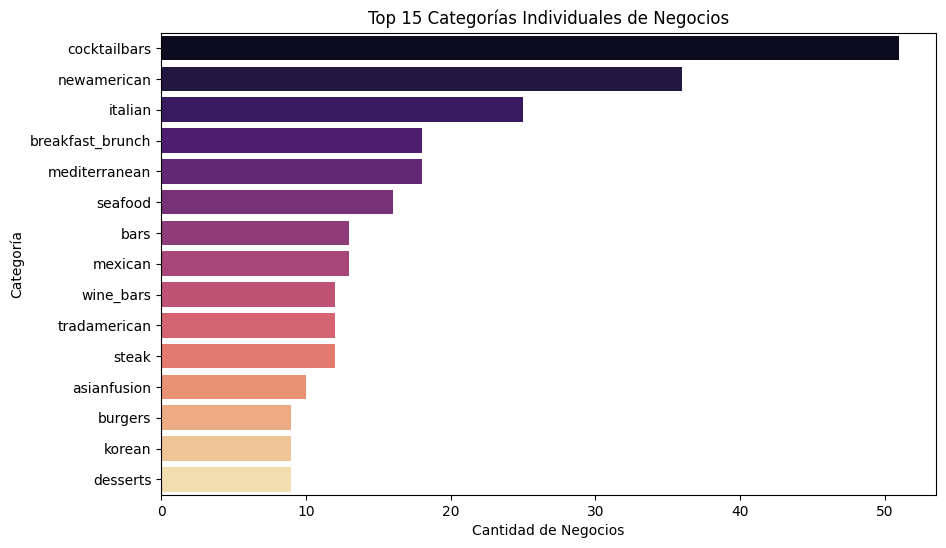

In [45]:
plt.figure(figsize=(10,6))
sns.barplot(x='Cantidad', y='Categoría', data=cat_df, palette='magma')
plt.title('Top 15 Categorías Individuales de Negocios')
plt.xlabel('Cantidad de Negocios')
plt.ylabel('Categoría')
plt.show()

Llama la atención que, aunque en Chicago existe una fuerte cultura de consumo de carne (que podemos observar en alguna de las gráficas iniciales), esto no se refleja claramente en el gráfico de las categorías más frecuentes.  
Esto puede deberse a que las categorías relacionadas con carne están distribuidas en varios términos específicos (como 'steak', 'bbq', 'burgers', etc.) y no agrupadas bajo una sola etiqueta.  
Por ello, es importante analizar de manera agregada todas las categorías asociadas a carne para obtener una visión más precisa del predominio de este tipo de oferta gastronómica en la ciudad.

Para analizar correctamente la presencia de restaurantes de carne en Chicago, es necesario agrupar todas las categorías relacionadas con este tipo de comida, ya que en el dataset aparecen bajo distintos nombres (por ejemplo, 'steak', 'bbq', 'burgers', etc.).

El siguiente bloque de código crea una lista de aliases asociados a carne y cuenta cuántos restaurantes pertenecen a cada una de estas categorías

In [ ]:
# Lista de categorías relacionadas con carne
carne_categorias = [
    'steak', 'steakhouse', 'bbq', 'burgers', 'tradamerican', 'newamerican',
    'hotdog', 'chicken_wings', 'chicken', 'barbeque', 'sandwiches'
]

# Conteo de todas las categorías individuales
cat_counts = restaurantes.explode('aliases')['aliases'].value_counts()

# Sumar solo las categorías de carne
carne_counts = cat_counts[cat_counts.index.isin(carne_categorias)]


El siguiente gráfico de barras muestra la cantidad de negocios en Chicago asociados a cada una de las principales categorías relacionadas con carne.  
Esta visualización permite identificar, de manera desagregada, cuáles son los tipos de restaurantes de carne más representativos en la ciudad y comparar su presencia relativa.  
Así, se obtiene una visión más precisa del peso real de la oferta cárnica, que no se aprecia claramente cuando las categorías aparecen dispersas bajo diferentes nombres en el análisis general.

C:\Users\mfyz1\AppData\Local\Temp\ipykernel_18996\2476196328.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cantidad', y='Categoría', data=carne_df, palette='Reds')


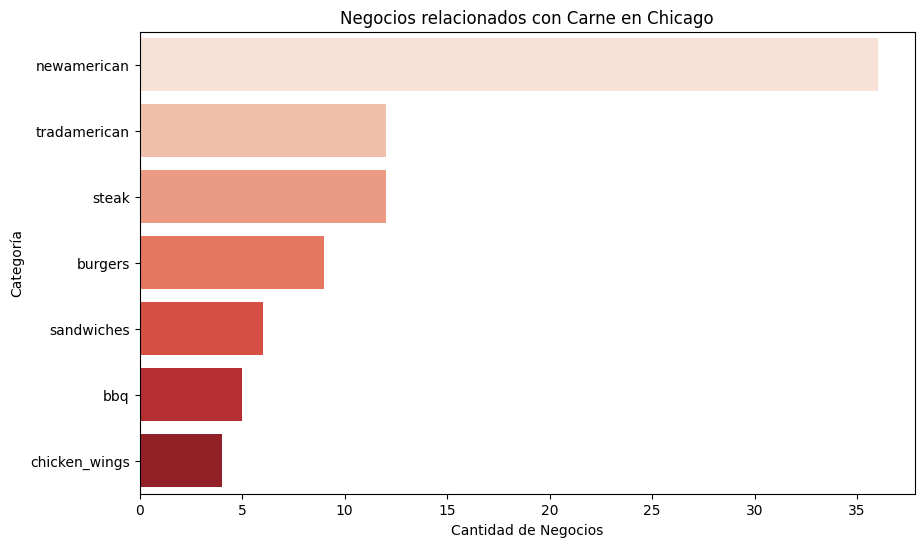

In [47]:
carne_df = carne_counts.reset_index()
carne_df.columns = ['Categoría', 'Cantidad']

plt.figure(figsize=(10,6))
sns.barplot(x='Cantidad', y='Categoría', data=carne_df, palette='Reds')
plt.title('Negocios relacionados con Carne en Chicago')
plt.xlabel('Cantidad de Negocios')
plt.ylabel('Categoría')
plt.show()

No obstante, para visualizar de manera aún más clara la relevancia de las categorías de carne frente al resto, se presenta el siguiente gráfico comparativo.  
Este permite observar, dentro del ranking de las categorías más frecuentes, cuáles corresponden a carne y cómo se posicionan respecto a otras opciones gastronómicas en Chicago.

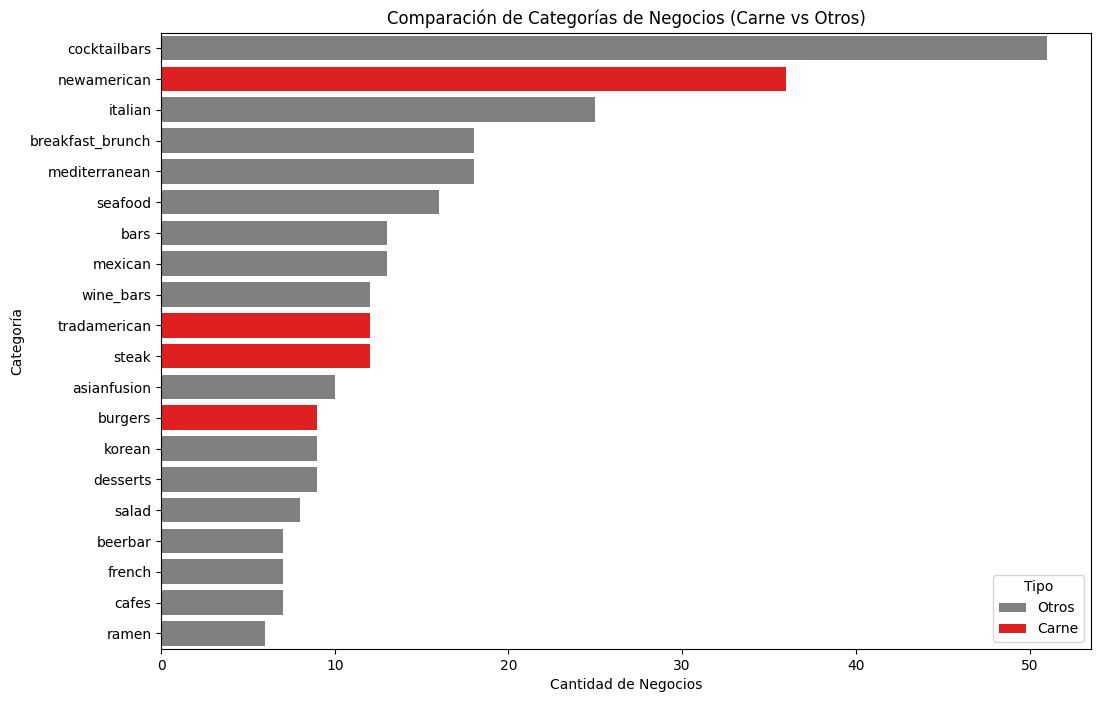

In [49]:
# Lista de categorías relacionadas con carne
carne_categorias = [
    'steak', 'steakhouse', 'bbq', 'burgers', 'tradamerican', 'newamerican',
    'hotdog', 'chicken_wings', 'chicken', 'barbeque', 'sandwiches'
]

# Conteo de todas las categorías individuales
cat_counts = restaurantes.explode('aliases')['aliases'].value_counts()

# Crear DataFrame con todas las categorías
cat_df = cat_counts.reset_index()
cat_df.columns = ['Categoría', 'Cantidad']

# Agregar columna para indicar si es de carne o no
cat_df['Tipo'] = cat_df['Categoría'].apply(lambda x: 'Carne' if x in carne_categorias else 'Otros')

# Graficar todas las categorías, coloreando por tipo
plt.figure(figsize=(12,8))
sns.barplot(
    x='Cantidad',
    y='Categoría',
    data=cat_df.head(20),  # Puedes ajustar el número de categorías a mostrar
    hue='Tipo',
    dodge=False,
    palette={'Carne': 'red', 'Otros': 'gray'}
)
plt.title('Comparación de Categorías de Negocios (Carne vs Otros)')
plt.xlabel('Cantidad de Negocios')
plt.ylabel('Categoría')
plt.legend(title='Tipo')
plt.show()

Para ilustrar de mejor manera y más claramente la relevancia de la oferta cárnica frente al resto de categorías, se agrupan todas las categorías relacionadas con carne bajo una sola barra ("Carne") y se comparan con las demás categorías individuales más frecuentes.  
Esto permite visualizar el peso real de los restaurantes de carne en el contexto general de la oferta gastronómica de Chicago.


C:\Users\mfyz1\AppData\Local\Temp\ipykernel_18996\2431774099.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cantidad', y='Categoría', data=comparacion_df, palette='magma')


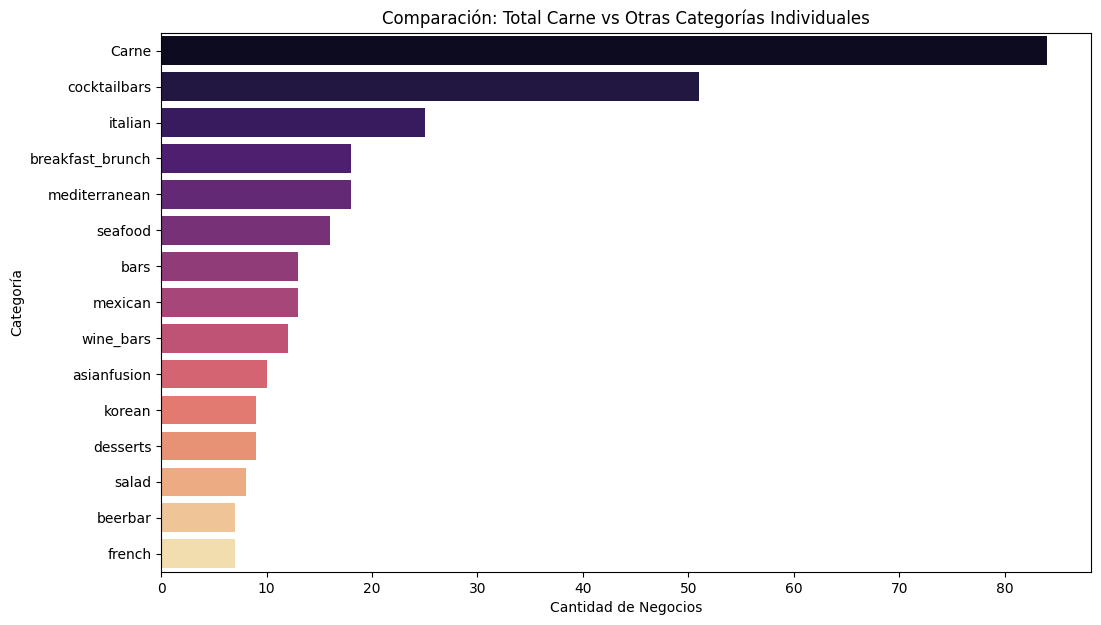

In [51]:
# Lista de categorías relacionadas con carne
carne_categorias = [
    'steak', 'steakhouse', 'bbq', 'burgers', 'tradamerican', 'newamerican',
    'hotdog', 'chicken_wings', 'chicken', 'barbeque', 'sandwiches'
]

# Conteo de todas las categorías individuales
cat_counts = restaurantes.explode('aliases')['aliases'].value_counts()

# Sumar todas las categorías de carne
total_carne = cat_counts[cat_counts.index.isin(carne_categorias)].sum()

# Filtrar las categorías que NO son de carne
otros_df = cat_counts[~cat_counts.index.isin(carne_categorias)].reset_index()
otros_df.columns = ['Categoría', 'Cantidad']

# Agregar la barra de "Carne" sumada
comparacion_df = pd.concat([
    pd.DataFrame({'Categoría': ['Carne'], 'Cantidad': [total_carne]}),
    otros_df
], ignore_index=True)

# Opcional: mostrar solo las más frecuentes (ajusta el número si quieres)
comparacion_df = comparacion_df.sort_values('Cantidad', ascending=False).head(15)

plt.figure(figsize=(12,7))
sns.barplot(x='Cantidad', y='Categoría', data=comparacion_df, palette='magma')
plt.title('Comparación: Total Carne vs Otras Categorías Individuales')
plt.xlabel('Cantidad de Negocios')
plt.ylabel('Categoría')
plt.show()

El siguiente gráfico de dispersión muestra la relación entre el número de reseñas recibidas y el rating promedio de los restaurantes en Chicago.  
Esta visualización permite identificar si existe alguna tendencia entre la popularidad (medida por la cantidad de reseñas) y la calificación otorgada por los usuarios, así como detectar posibles agrupamientos o valores atípicos en ambos ejes.

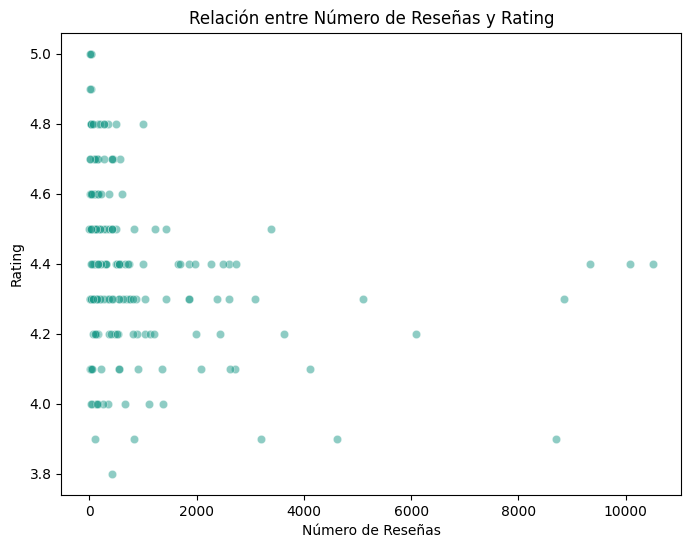

In [63]:
# Gráfico de dispersión entre número de reseñas y rating

plt.figure(figsize=(8,6))
colors = sns.color_palette('viridis', n_colors=10)
sns.scatterplot(data=restaurantes, x='review_count', y='rating', alpha=0.5, color=colors[5])
plt.title('Relación entre Número de Reseñas y Rating')
plt.xlabel('Número de Reseñas')
plt.ylabel('Rating')
plt.show()

El siguiente mapa de calor muestra la matriz de correlaciones entre las variables numéricas del DataFrame de restaurantes.  
Esta visualización permite identificar relaciones lineales (positivas o negativas) entre variables como el número de reseñas, el rating, el precio, entre otras, facilitando la detección de patrones y posibles dependencias dentro de los datos.

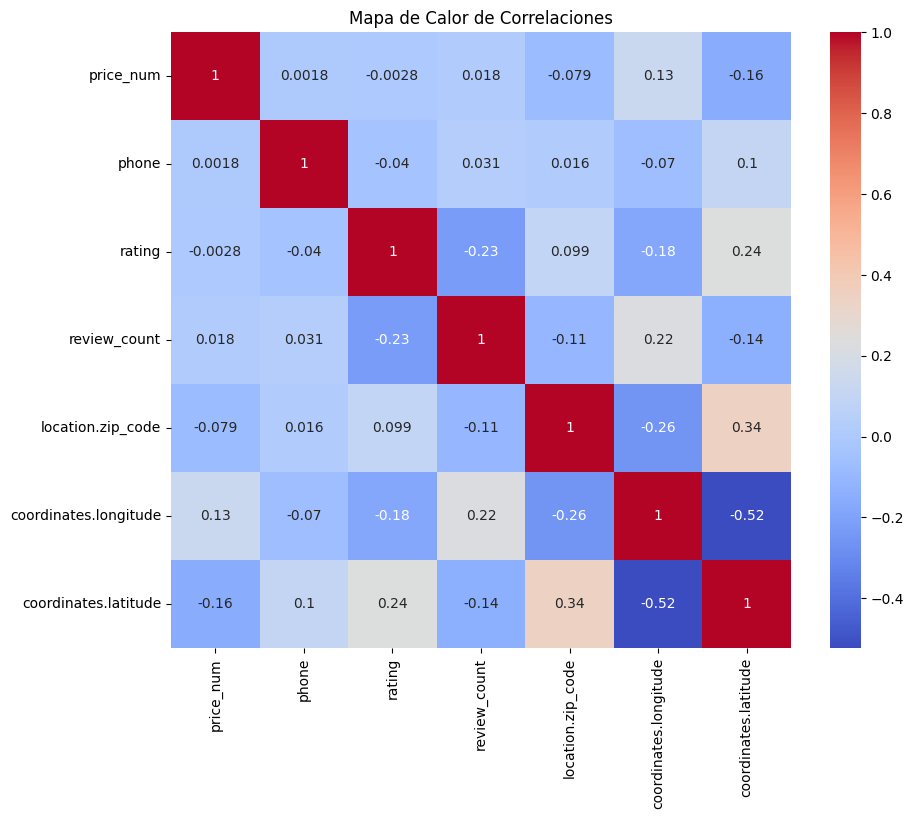

In [53]:
# mapa de calor para el dataframe 'restaurantes

plt.figure(figsize=(10,8))
numeric_cols = restaurantes.select_dtypes(include=np.number)
if numeric_cols.shape[1] > 1:
    sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
    plt.title('Mapa de Calor de Correlaciones')
    plt.show()
else:
    print("No hay suficientes columnas numéricas para mostrar el mapa de calor.")

El siguiente gráfico de barras apiladas muestra la distribución de las preferencias alimenticias de los usuarios en la ciudad de Chicago.  
Esta visualización permite comparar la popularidad relativa de cada tipo de preferencia (por ejemplo, carnes, vegetariano, vegano, etc.), facilitando la identificación de tendencias locales y posibles oportunidades de segmentación de mercado.

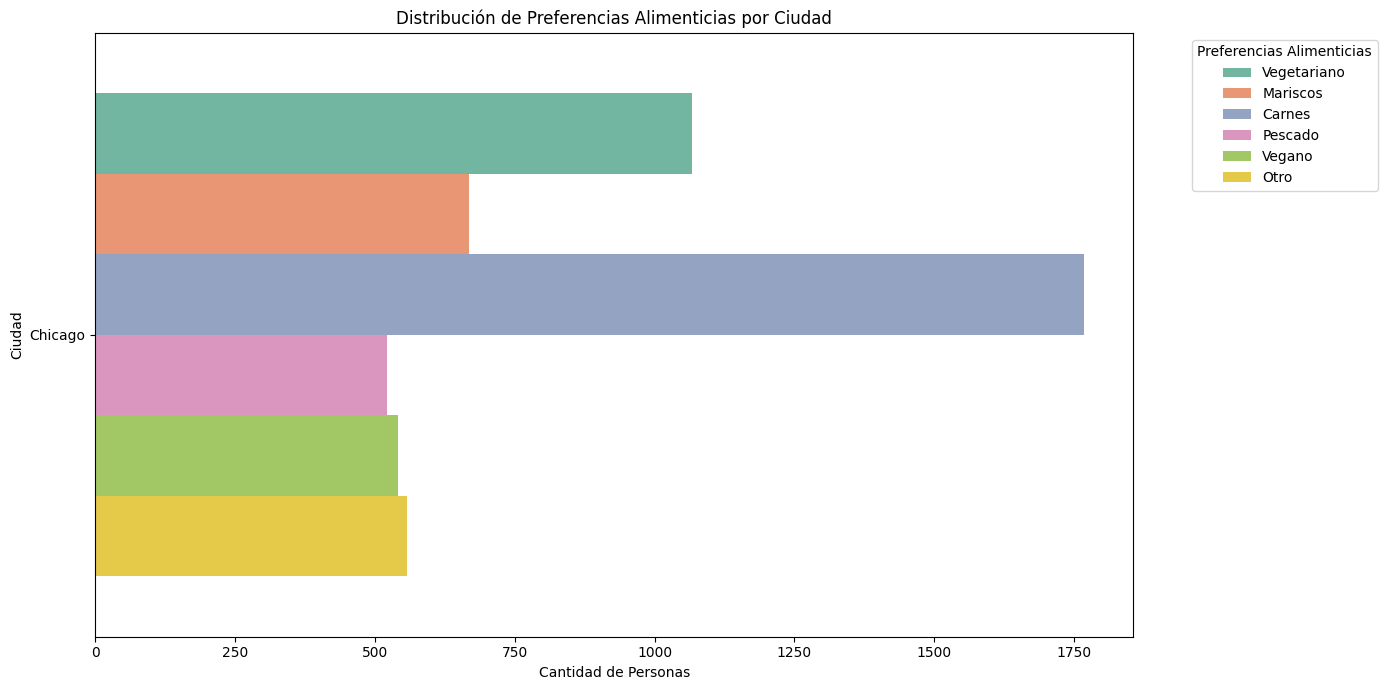

In [54]:
# Muestra la distribución de las preferencias alimenticias por ciudad

plt.figure(figsize=(14,7))
sns.countplot(
    data=usuarios,
    y='ciudad_residencia',
    hue='preferencias_alimenticias',
    palette='Set2'
)
plt.title('Distribución de Preferencias Alimenticias por Ciudad')
plt.xlabel('Cantidad de Personas')
plt.ylabel('Ciudad')
plt.legend(title='Preferencias Alimenticias', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

El siguiente gráfico de barras muestra los 10 códigos postales con mayor cantidad de restaurantes en Chicago.  
Esta visualización permite identificar las zonas con mayor concentración de oferta gastronómica, lo que puede ser útil para analizar la competencia, planificar estrategias de expansión o focalizar campañas de marketing en las áreas más activas de la ciudad.


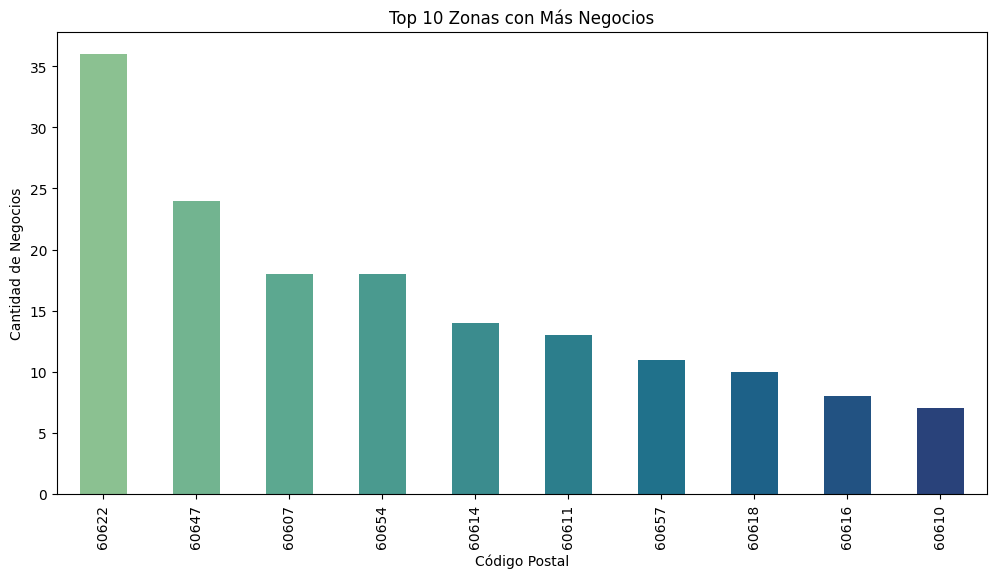

In [61]:
# Gráfico de barras para las 10 zonas con más negocios

plt.figure(figsize=(12,6))
colors = sns.color_palette('crest', n_colors=10)
restaurantes['location.zip_code'].value_counts().head(10).plot(kind='bar', color=colors)
plt.title('Top 10 Zonas con Más Negocios')
plt.xlabel('Código Postal')
plt.ylabel('Cantidad de Negocios')
plt.show()

Sin embargo, al mostrar únicamente los códigos postales, no se visualiza claramente en qué barrios o zonas específicas de la ciudad se concentra la mayor cantidad de restaurantes.  
Por ello, se realiza un mapeo de los códigos postales (`zip_code`) a los nombres de los barrios correspondientes.  
Esto permite analizar y comunicar de manera más intuitiva la distribución geográfica de la oferta gastronómica, facilitando la identificación de áreas clave para estrategias comerciales o de expansión.

A continuación, se presenta el mapeo y la visualización por barrio:

Se muestra el diccionario de mapeo utilizado para relacionar los códigos postales (`zip_code`) más frecuentes de Chicago con sus respectivos barrios. Este mapeo permite transformar la columna de códigos postales en nombres de zonas reconocibles, facilitando el análisis y la visualización de la concentración de restaurantes por barrio:

In [57]:
zip_to_barrio = {
    '60614': 'Lincoln Park',
    '60615': 'Hyde Park',
    '60637': 'Hyde Park',
    '60622': 'Wicker Park',
    '60647': 'Wicker Park',
    '60601': 'The Loop',
    '60602': 'The Loop',
    '60603': 'The Loop',
    '60604': 'The Loop',
    '60605': 'The Loop',
    '60606': 'The Loop',  # También West Loop y River North, elige el que prefieras o pon una lista
    '60607': 'The Loop',  # También West Loop
    '60654': 'River North',
    '60613': 'Lakeview',
    '60657': 'Lakeview',
    '60661': 'West Loop',
    '60610': 'Gold Coast',
    '60611': 'Gold Coast'
}

Para facilitar el análisis geográfico, se crea una nueva columna `'barrio'` en el DataFrame de restaurantes, asignando a cada restaurante el nombre del barrio correspondiente según su código postal.

In [58]:
restaurantes['barrio'] = restaurantes['location.zip_code'].astype(str).map(zip_to_barrio)

El siguiente gráfico de barras muestra los 10 barrios de Chicago con mayor cantidad de restaurantes, utilizando la columna `'barrio'` generada a partir del mapeo de códigos postales. Esto permite identificar de manera más intuitiva las zonas con mayor concentración de oferta gastronómica en la ciudad:


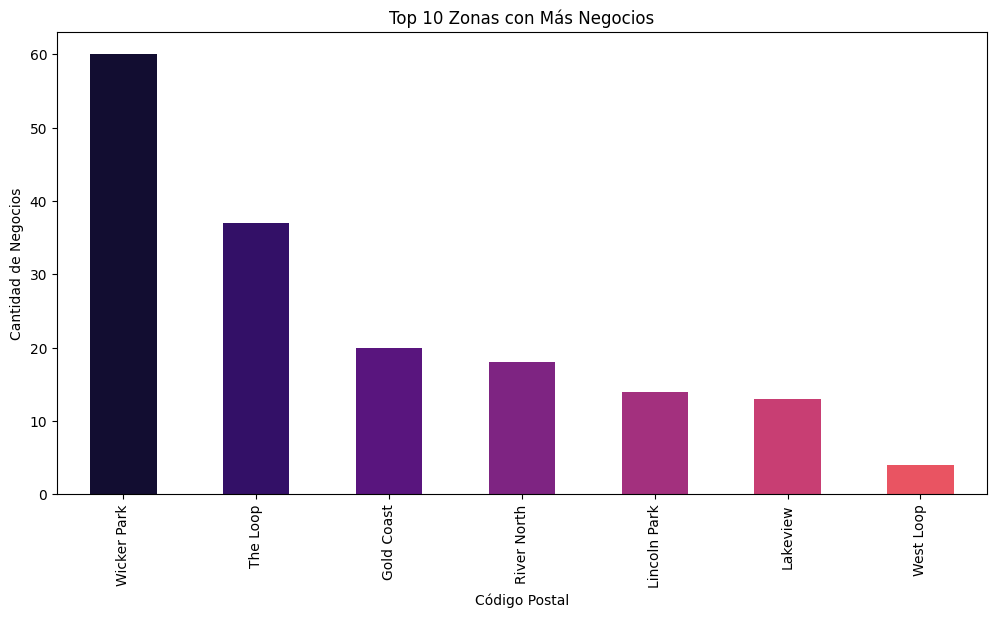

In [60]:
# Gráfico de barras para las 10 zonas con más negocios

plt.figure(figsize=(12,6))
colors = sns.color_palette('magma', n_colors=10)
restaurantes['barrio'].value_counts().head(10).plot(kind='bar', color=colors)
plt.title('Top 10 Zonas con Más Negocios')
plt.xlabel('Código Postal')
plt.ylabel('Cantidad de Negocios')
plt.show()


---

## **Conclusiones Finales del Proyecto (Avances 1, 2 y 3)**

- **Integración de datos como ventaja competitiva:**  
  La combinación de información demográfica, preferencias y oferta real de restaurantes ha permitido obtener una visión integral del mercado gastronómico de Chicago, facilitando la identificación de patrones de consumo, afinidades y oportunidades de negocio.

- **Segmentación y personalización:**  
  El análisis cruzado de usuarios y restaurantes posibilita una segmentación más precisa y la personalización de recomendaciones, campañas y productos, mejorando la experiencia del cliente y la efectividad de las acciones comerciales.

- **Visualización para la toma de decisiones:**  
  Las visualizaciones desarrolladas han sido clave para comunicar hallazgos, detectar tendencias y respaldar decisiones estratégicas basadas en datos reales y actualizados.

- **Oportunidades de crecimiento:**  
  Existen áreas geográficas y segmentos de usuarios con alto potencial de crecimiento, tanto para la expansión de la oferta gastronómica como para el desarrollo de servicios exclusivos (membresías, experiencias premium, etc.).

- **Recomendaciones estratégicas:**  
  Se recomienda a la empresa focalizar esfuerzos en los barrios con mayor concentración y gasto, diversificar la oferta para captar tendencias emergentes (vegetariano, vegano), y aprovechar el sistema de recomendación para fidelizar clientes y maximizar el valor de cada segmento.
 
> ***Para un análisis más detallado, consulte el entregable “Sugerencias”***


---



**Este análisis integral sienta las bases para una gestión más inteligente y orientada a datos, permitiendo anticipar tendencias, personalizar la comunicación y maximizar el impacto de las acciones comerciales en un entorno altamente competitivo.**

> **Nota:**  
> Por motivos de tiempo y alcance del proyecto, algunas mejores prácticas de desarrollo, optimización y documentación no se implementaron en su totalidad. Sin embargo, el análisis y los resultados presentados cumplen con los objetivos principales del entregable.